In [86]:
import pandas as pd
import numpy as np


In [87]:
#Loading the data
df=pd.read_csv('/content/drive/MyDrive/automobile_performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_efficiency     398 non-null    float64
 1   engine_config       398 non-null    int64  
 2   engine_volume       398 non-null    float64
 3   power_output        398 non-null    object 
 4   vehicle_mass        398 non-null    int64  
 5   accel_capability    398 non-null    float64
 6   release_year        398 non-null    int64  
 7   manufacture_region  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [88]:
# Here power_output is of object type we have to convert it to numeric type
df['power_output'] = pd.to_numeric(df['power_output'], errors='coerce')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_efficiency     398 non-null    float64
 1   engine_config       398 non-null    int64  
 2   engine_volume       398 non-null    float64
 3   power_output        392 non-null    float64
 4   vehicle_mass        398 non-null    int64  
 5   accel_capability    398 non-null    float64
 6   release_year        398 non-null    int64  
 7   manufacture_region  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [90]:
df.shape

(398, 8)

In [91]:
# checking null values in the data

df.isnull().sum()
# Since there are no missing values in the data there is no need of imputation or handling of missing values.

,0
fuel_efficiency,0
engine_config,0
engine_volume,0
power_output,6
vehicle_mass,0
accel_capability,0
release_year,0
manufacture_region,0


In [92]:
# Convert 'power_output' to numeric and impute missing values with median
from sklearn.impute import SimpleImputer
df['power_output'] = pd.to_numeric(df['power_output'], errors='coerce')
imputer = SimpleImputer(strategy='median')
df['power_output'] = imputer.fit_transform(df[['power_output']])


In [93]:
# check if missing values exist in different format
placeholders = ["?", "NA", "N/A", "none", "None", "", "null", "NULL", "-1", "999"]
for value in placeholders:
    print(f"\nMissing placeholder: '{value}'")
    print(df.isin([value]).sum())



Missing placeholder: '?'
fuel_efficiency       0
engine_config         0
engine_volume         0
power_output          0
vehicle_mass          0
accel_capability      0
release_year          0
manufacture_region    0
dtype: int64

Missing placeholder: 'NA'
fuel_efficiency       0
engine_config         0
engine_volume         0
power_output          0
vehicle_mass          0
accel_capability      0
release_year          0
manufacture_region    0
dtype: int64

Missing placeholder: 'N/A'
fuel_efficiency       0
engine_config         0
engine_volume         0
power_output          0
vehicle_mass          0
accel_capability      0
release_year          0
manufacture_region    0
dtype: int64

Missing placeholder: 'none'
fuel_efficiency       0
engine_config         0
engine_volume         0
power_output          0
vehicle_mass          0
accel_capability      0
release_year          0
manufacture_region    0
dtype: int64

Missing placeholder: 'None'
fuel_efficiency       0
engine_config    

In [94]:
# Handling outliers in the data using internal quantile region

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower, lower, data[column])
    data[column] = np.where(data[column] > upper, upper, data[column])
    return data

for col in ['fuel_efficiency', 'power_output', 'accel_capability']:
    df = cap_outliers_iqr(df, col)



In [95]:
num_cols

Index(['fuel_efficiency', 'engine_config', 'engine_volume', 'power_output',
       'vehicle_mass', 'accel_capability', 'release_year',
       'manufacture_region'],
      dtype='object')

In [96]:
df.shape

(398, 8)

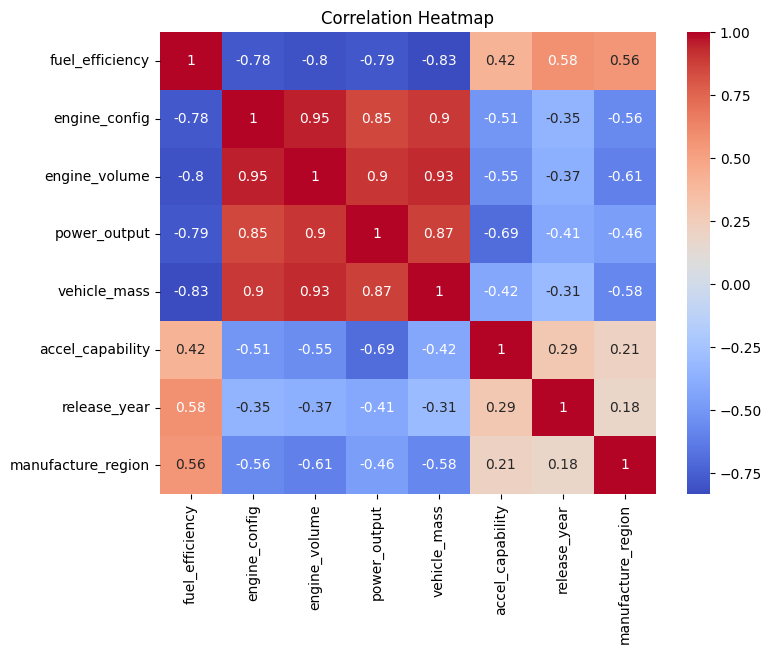

In [97]:
# correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [98]:
# Feature selection based on correlated threshold
X=df.drop(columns=['engine_volume', 'engine_config','fuel_efficiency'])  # multi corelated fields and target feature
y=df['fuel_efficiency']

In [99]:
# feature scaling (normalizing the features so all numerical features have equal weight)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_feature=sc.fit_transform(X)

In [100]:
 # splitting the data into train and test sets
 from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
 x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
# model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [102]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
print('R2 SCORE:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',root_mean_squared_error(y_test,y_pred))

R2 SCORE: 0.8419174387567216
MSE: 8.499537136942658
RMSE: 2.915396565982518


In [103]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
y_tre_pred=tree_model.predict(x_test)
print('R2 SCORE:',r2_score(y_test,y_tre_pred))
print('MSE:',mean_squared_error(y_test,y_tre_pred))
print('RMSE:',root_mean_squared_error(y_test,y_tre_pred))

R2 SCORE: 0.7829780214913322
MSE: 11.6685
RMSE: 3.415918617297549


In [104]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print('R2 SCORE:',r2_score(y_test,y_pred_xgb))
print('MSE:',mean_squared_error(y_test,y_pred_xgb))
print('RMSE:',root_mean_squared_error(y_test,y_pred_xgb))

R2 SCORE: 0.8822696248968411
MSE: 6.329943590650389
RMSE: 2.5159379147050487


From the three models XGBRegressor produces best accuracy.

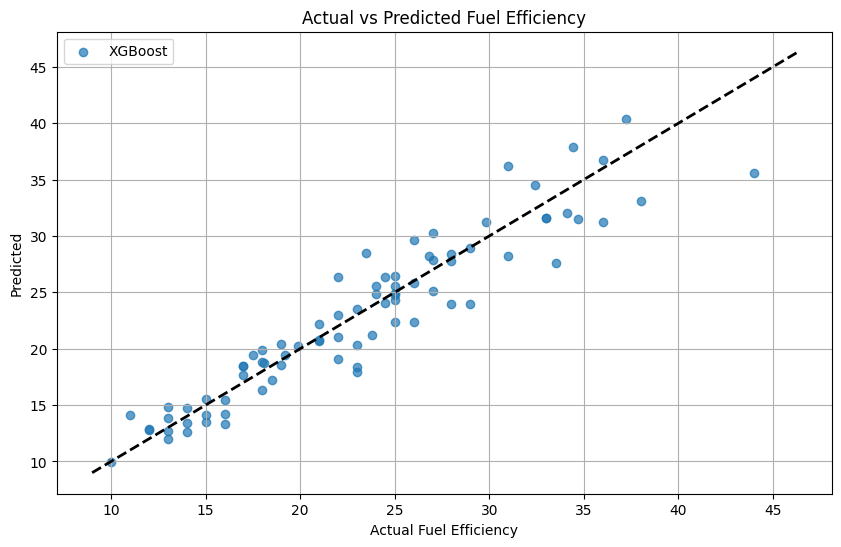

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label="XGBoost")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Fuel Efficiency')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Fuel Efficiency')
plt.legend()
plt.grid(True)
plt.show()


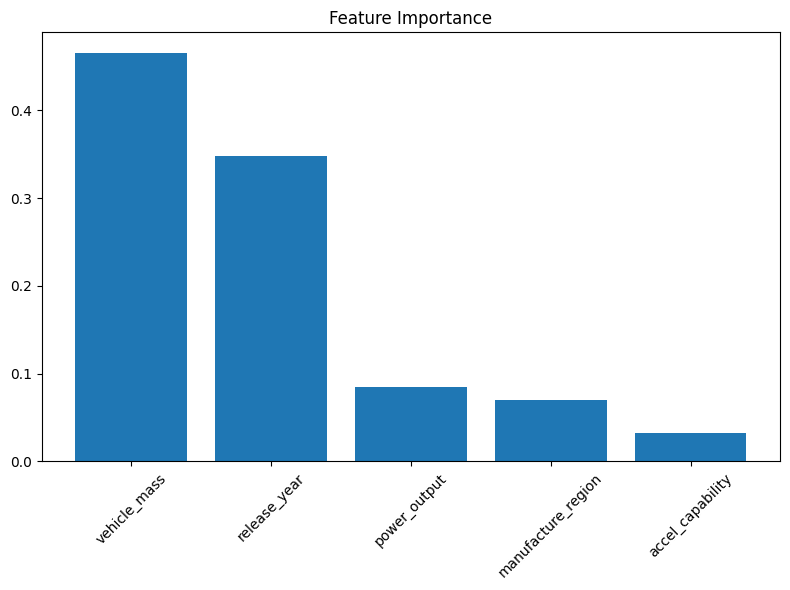

In [106]:
#Feature Importance
feature_names = df.drop(columns=['fuel_efficiency','engine_volume', 'engine_config']).columns.tolist()
importance = xgb.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_names)), importance[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
